In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scanpy.external as sce
import decoupler as dc
import scanorama

In [2]:
adata_cc=ad.read_h5ad("./results_harm.h5ad")

In [3]:
annos = ["Azini normal", "ADM Early", "ADM Full", "ADM MTC"]
adata_cc = adata_cc[adata_cc.obs["anno_TM"].isin(annos)].copy()
adata_cc.obs

,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,anno_TM,n_counts,dataset,clusters
AACAGGATTCATAGTT-1-926983,1,49,43,4948,8.506941,11842.0,9.379492,21.871306,26.954906,33.355852,45.287958,0.0,0.0,0.0,ADM Full,11842.0,926983,2
AACAGGTTCACCGAAG-1-926983,1,51,41,4265,8.358432,9020.0,9.107310,19.223947,24.456763,31.363636,44.290466,0.0,0.0,0.0,ADM Early,9020.0,926983,2
AACAGTCAGGCTCCGC-1-926983,1,24,6,3243,8.084562,5712.0,8.650499,17.594538,22.934174,30.112045,43.714986,0.0,0.0,0.0,ADM MTC,5712.0,926983,4
AACAGTCCACGCGGTG-1-926983,1,12,10,4433,8.397057,11936.0,9.387398,33.704759,38.429960,44.202413,54.926273,0.0,0.0,0.0,ADM Early,11936.0,926983,2
AACATCTTAAGGCTCA-1-926983,1,16,8,2963,7.994295,8449.0,9.041922,50.704225,54.278613,58.752515,67.215055,0.0,0.0,0.0,ADM Early,8449.0,926983,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTTCACTGTCTTCCT-1-38032,1,23,13,2747,7.918629,5771.0,8.660774,29.925490,35.609080,42.904176,55.761566,0.0,0.0,0.0,ADM MTC,5771.0,38032,0
TGTTCATAGTATGACG-1-38032,1,49,33,1153,7.050989,7289.0,8.894258,81.629853,83.797503,86.541364,91.041295,0.0,0.0,0.0,Azini normal,7289.0,38032,1
TGTTCGCAACCGCCAA-1-38032,1,74,110,3395,8.130354,7483.0,8.920523,26.580249,32.126153,39.315782,52.559134,0.0,0.0,0.0,ADM MTC,7483.0,38032,0
TGTTCTGCTCTGTCGT-1-38032,1,39,39,2688,7.896925,8844.0,9.087607,53.674808,57.700136,62.867481,71.257350,0.0,0.0,0.0,ADM MTC,8844.0,38032,0


In [4]:
sc.pp.pca(adata_cc)

In [5]:
sc.pp.neighbors(adata_cc)
sc.tl.umap(adata_cc)
sc.tl.leiden(adata_cc, key_added="clusters", resolution=0.8)



Failed to import TF-Keras. Please note that TF-Keras is not installed by default when you install TensorFlow Probability. This is so that JAX-only users do not have to install TensorFlow or TF-Keras. To use TensorFlow Probability with TensorFlow, please install the tf-keras or tf-keras-nightly package.
This can be be done through installing the tensorflow-probability[tf] extra.




C:\Users\thmet\AppData\Local\Temp\ipykernel_3888\2594085616.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_cc, key_added="clusters", resolution=0.8)


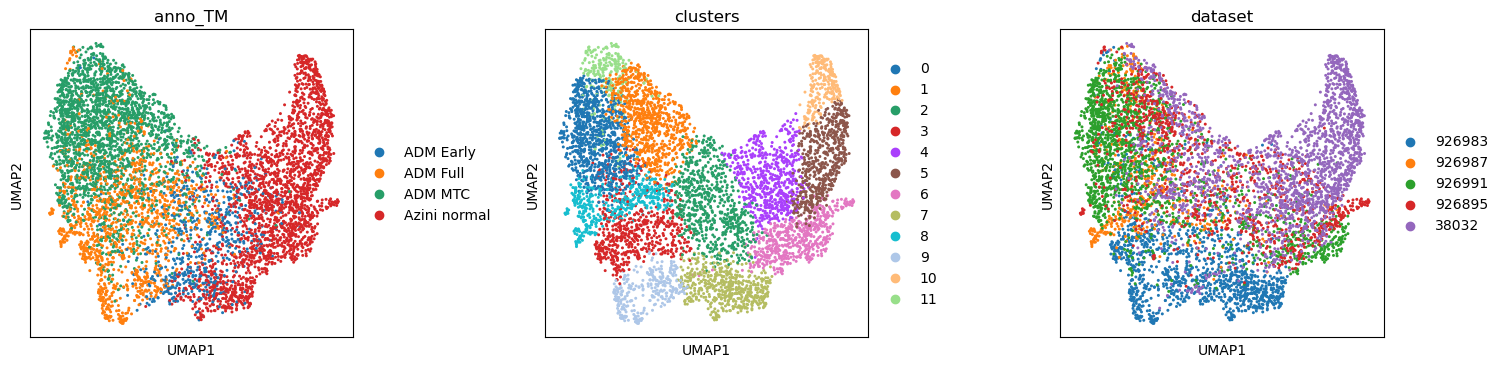

In [6]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata_cc, color=["anno_TM", "clusters", "dataset"], wspace=0.45, save="umap_uncorrected_acinar.pdf")

In [7]:
sce.pp.harmony_integrate(adata_cc, 'dataset')

2024-10-01 15:36:10,213 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-10-01 15:36:11,140 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-10-01 15:36:11,188 - harmonypy - INFO - Iteration 1 of 10
2024-10-01 15:36:12,958 - harmonypy - INFO - Iteration 2 of 10
2024-10-01 15:36:14,607 - harmonypy - INFO - Iteration 3 of 10
2024-10-01 15:36:16,309 - harmonypy - INFO - Iteration 4 of 10
2024-10-01 15:36:18,028 - harmonypy - INFO - Iteration 5 of 10
2024-10-01 15:36:19,877 - harmonypy - INFO - Converged after 5 iterations


In [8]:
sc.pp.neighbors(adata_cc, use_rep="X_pca_harmony")
sc.tl.umap(adata_cc)
sc.tl.leiden(adata_cc, key_added="clusters", resolution=0.76)

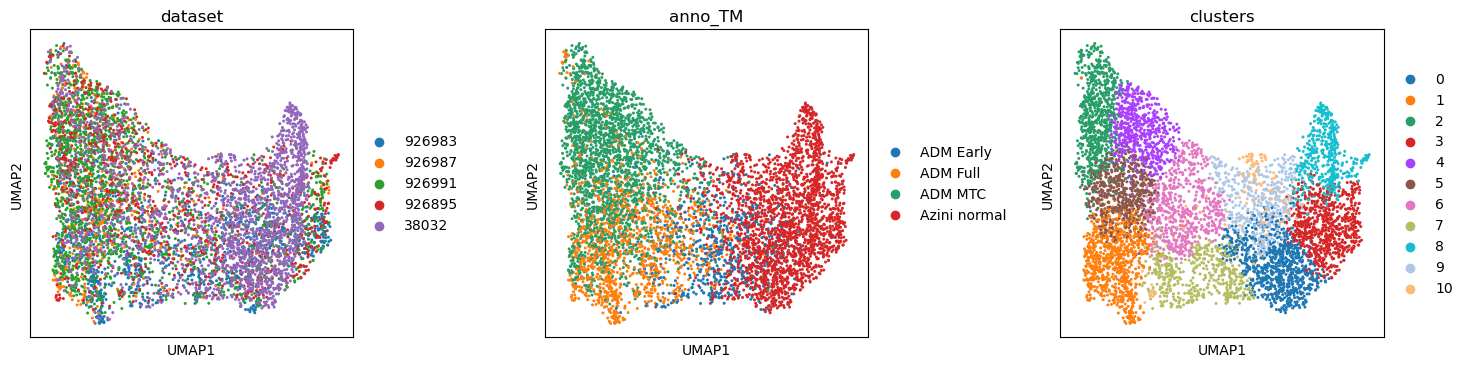

In [9]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata_cc, color=["dataset", "anno_TM", "clusters"], wspace=0.45, save="umap_corrected_acinar.pdf")

In [10]:
adata_cc.write("./results_preneopl_acinar_harm.h5ad")